<a href="https://colab.research.google.com/github/Sravan1410/-FeyNN_Labs_Project_2-EV_Market_Segmentation/blob/main/Dataset2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# STEP 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
# STEP 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# STEP 2: Load the CSV from Google Drive
# Adjust the path if your file is in a different folder
file_path = '/content/drive/MyDrive/StatewiseEVdata.csv'

# Load and clean
df_count = pd.read_csv(file_path)
df_count = df_count.rename(columns={'State Name': 'State', 'Electric Vehicle Count': 'EV Count'})
df_count = df_count.drop(columns=['S. No.', 'index'], errors='ignore')

# Show preview
df_count.head()


,State,EV Count
0,Andaman and Nicobar Island,182
1,Andhra Pradesh,51322
2,Arunachal Pradesh,24
3,Assam,94929
4,Bihar,128885


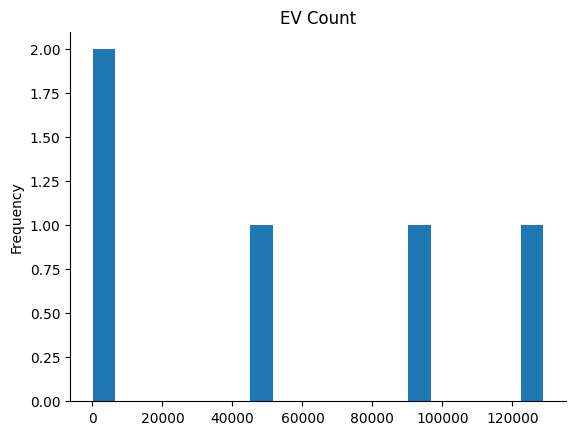

In [14]:
from matplotlib import pyplot as plt
_df_7['EV Count'].plot(kind='hist', bins=20, title='EV Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

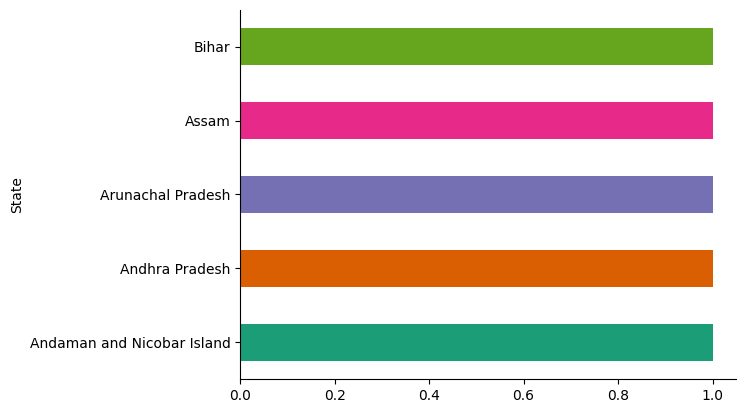

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_8.groupby('State').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

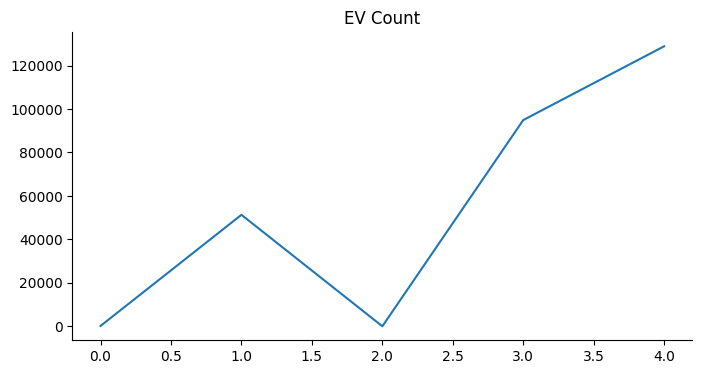

In [16]:
from matplotlib import pyplot as plt
_df_9['EV Count'].plot(kind='line', figsize=(8, 4), title='EV Count')
plt.gca().spines[['top', 'right']].set_visible(False)

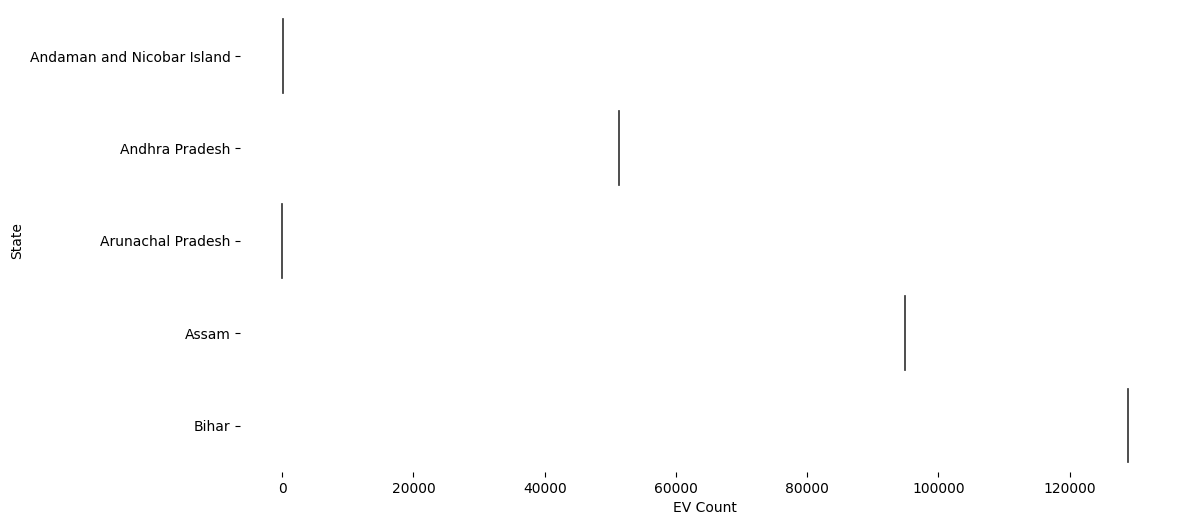

In [49]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_43['State'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_43, x='EV Count', y='State', inner='stick', palette='Dark2', hue='State', legend=False)
sns.despine(top=True, right=True, bottom=True, left=True)

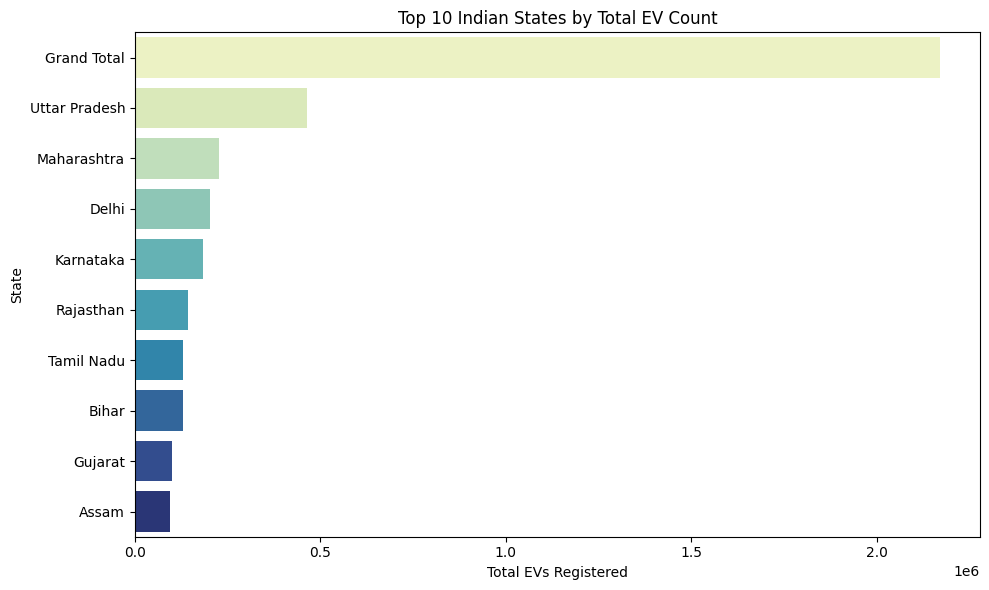

In [46]:
# STEP 3: Plot Top 10 States by EV Count
top_states = df_count.sort_values(by='EV Count', ascending=False).head(10)

plt.figure(figsize=(10,6))
# Modified to address FutureWarning
sns.barplot(data=top_states, x='EV Count', y='State', hue='State', palette='YlGnBu', legend=False)
plt.title("Top 10 Indian States by Total EV Count")
plt.xlabel("Total EVs Registered")
plt.ylabel("State")
plt.tight_layout()
plt.show()

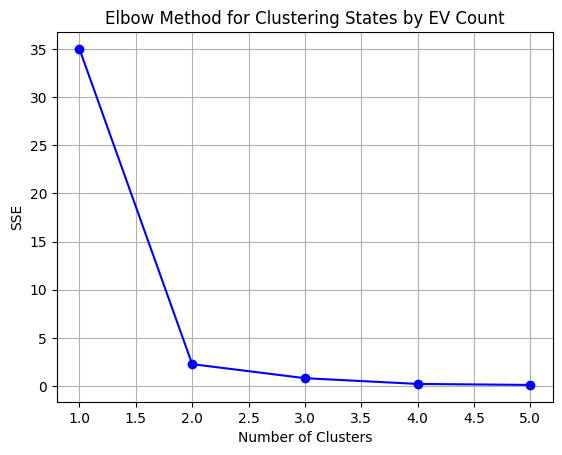

In [11]:
# STEP 4: Clustering (Optional but recommended for segmentation)
df_cluster = df_count.copy()
scaler = StandardScaler()
df_cluster['EV Count Scaled'] = scaler.fit_transform(df_cluster[['EV Count']])

# Elbow Method
sse = []
for k in range(1, 6):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_cluster[['EV Count Scaled']])
    sse.append(km.inertia_)

plt.plot(range(1, 6), sse, 'bo-')
plt.title('Elbow Method for Clustering States by EV Count')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.grid(True)
plt.show()


In [25]:
# ✅ KMeans Clustering (after choosing k)
optimal_k = 3  # You can change this based on elbow result

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_cluster['EV Cluster'] = kmeans.fit_predict(df_cluster[['EV Count Scaled']])

df_cluster[['State', 'EV Count', 'EV Cluster']].sort_values(by='EV Count', ascending=False).head()


,State,EV Count,EV Cluster
34,Grand Total,2170451,1
31,Uttar Pradesh,465432,2
18,Maharashtra,226134,2
7,Delhi,203263,2
14,Karnataka,183536,2


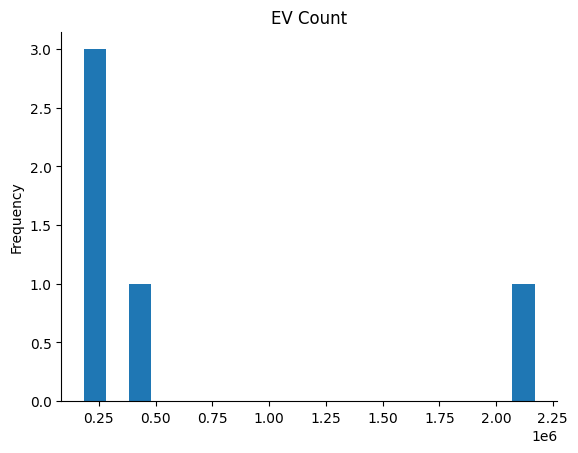

In [15]:
from matplotlib import pyplot as plt
_df_15['EV Count'].plot(kind='hist', bins=20, title='EV Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

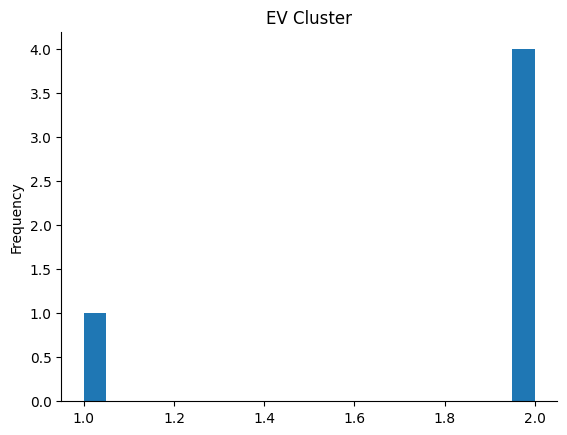

In [16]:
from matplotlib import pyplot as plt
_df_16['EV Cluster'].plot(kind='hist', bins=20, title='EV Cluster')
plt.gca().spines[['top', 'right',]].set_visible(False)

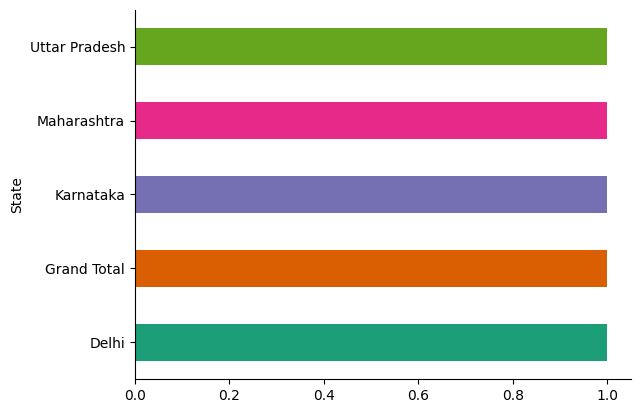

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_17.groupby('State').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

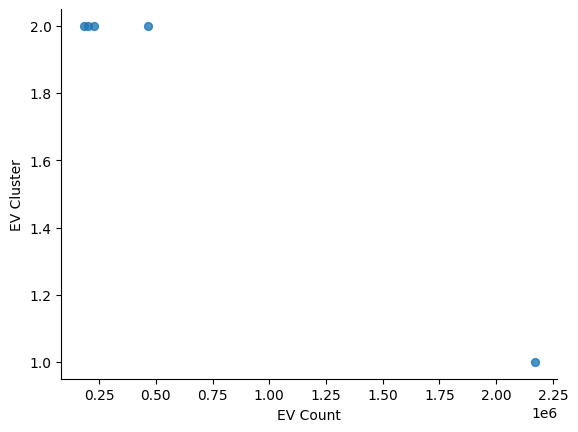

In [18]:
from matplotlib import pyplot as plt
_df_18.plot(kind='scatter', x='EV Count', y='EV Cluster', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

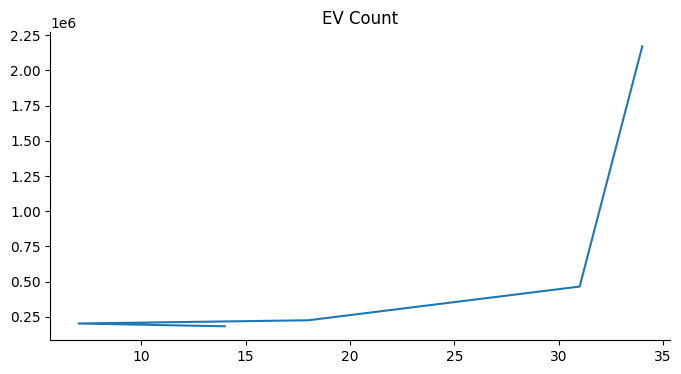

In [21]:
from matplotlib import pyplot as plt
_df_21['EV Count'].plot(kind='line', figsize=(8, 4), title='EV Count')
plt.gca().spines[['top', 'right']].set_visible(False)

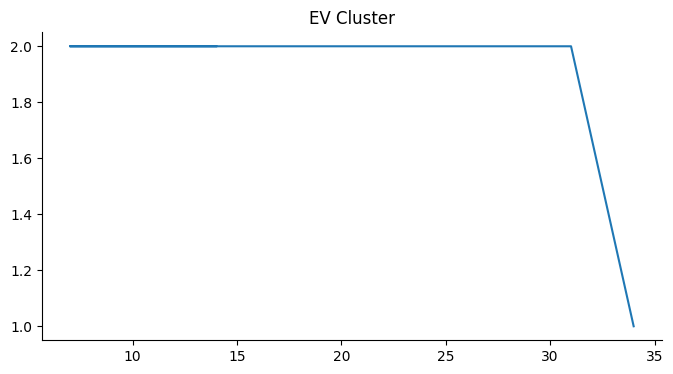

In [22]:
from matplotlib import pyplot as plt
_df_22['EV Cluster'].plot(kind='line', figsize=(8, 4), title='EV Cluster')
plt.gca().spines[['top', 'right']].set_visible(False)

/tmp/ipython-input-23-3176982560.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(_df_23, x='EV Count', y='State', inner='stick', palette='Dark2')


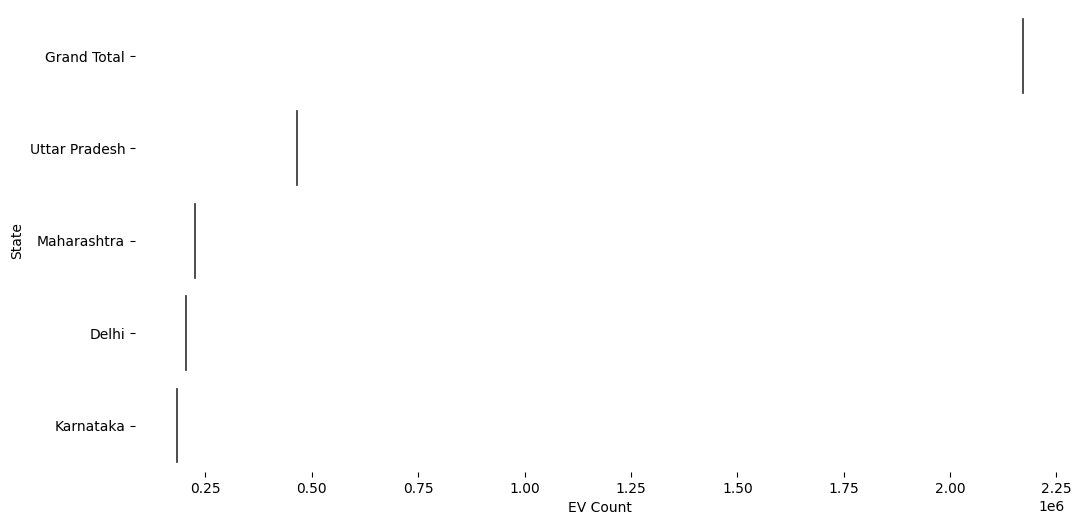

In [23]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['State'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='EV Count', y='State', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

/tmp/ipython-input-24-3442936613.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(_df_24, x='EV Cluster', y='State', inner='stick', palette='Dark2')


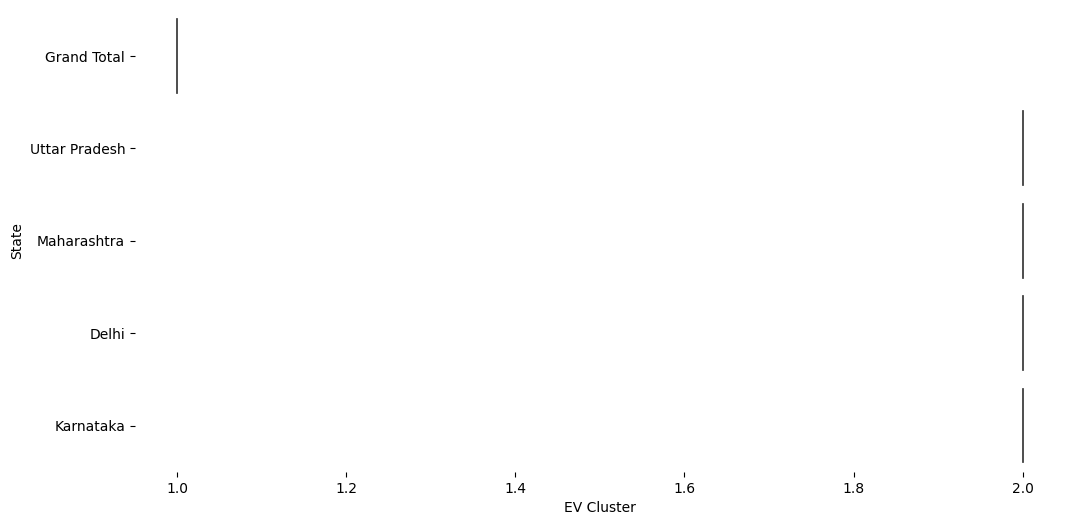

In [24]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['State'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='EV Cluster', y='State', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset 2 (adjust path if needed)
df_state = pd.read_csv('/content/drive/MyDrive/StatewiseEVdata.csv')

# Preview column names to make sure they match
df_state.columns


Index(['S. No.', 'State Name', 'Electric Vehicle Count'], dtype='object')

In [30]:
['State', '2W EVs', '3W EVs', '4W EVs', 'Total EVs']


['State', '2W EVs', '3W EVs', '4W EVs', 'Total EVs']

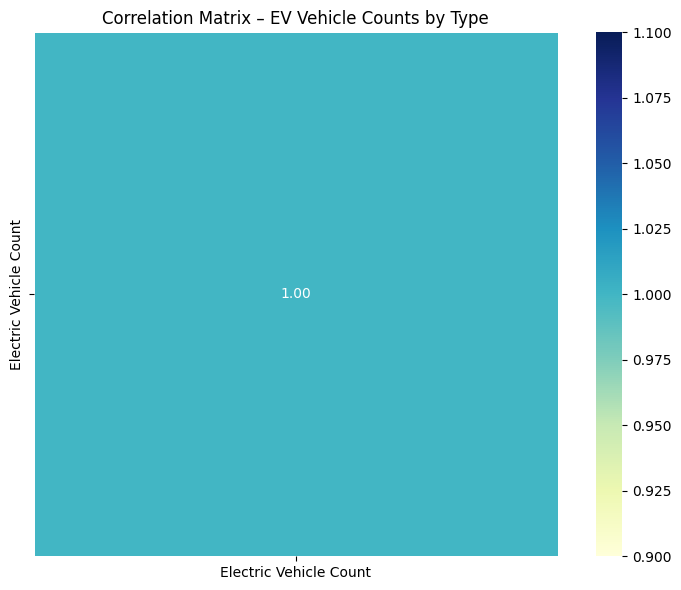

In [41]:
# Replace with correct column names
features = ['Electric Vehicle Count'] # <-- adjust these if needed

# Correlation matrix
df_corr = df_state[features].copy()
corr_matrix = df_corr.corr()

# Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Matrix – EV Vehicle Counts by Type")
plt.tight_layout()
plt.show()

In [27]:
# 💾 Save and download the segmented data
output_path = '/content/ev_state_clusters.csv'
df_cluster.to_csv(output_path, index=False)

from google.colab import files
files.download(output_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>